In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [34]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [36]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [39]:
inspector=inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [40]:
inspector=inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [60]:
row1 = session.query(Station).first()
row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25404a6cdd8>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# precip = Session(engine)
last_obs_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_obs_date

('2017-08-23')

In [42]:
# Calculate the date 1 year ago from the last data point in the database
prev_12mth =  dt.date(2017, 8, 23) - dt.timedelta(days = 365)
prev_12mth

datetime.date(2016, 8, 23)

In [43]:
# Perform a query to retrieve the data and precipitation scores
values = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_12mth).all()
# values
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(values, columns=["Date", "Precipitation"])
precip_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [76]:
# Sort the dataframe by date
precip_df.sort_values("Date")
precip_df.reset_index()
precip_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


![precipitation](Images/precipitation.png)

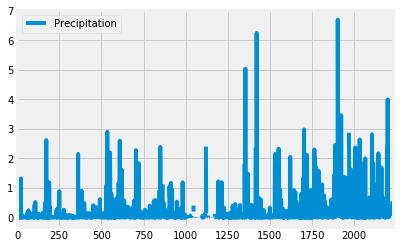

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()

In [22]:
#Matplotlib
# plt.bar(x="Date", height ="Precipitation")

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [53]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Station).group_by(Station.station).count()
print(locations)

9


In [56]:
# Query All Records in the the Station Database
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [57]:
# Query All Records in the the Measurement Database
engine.execute('SELECT * FROM Measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [70]:
# Join the two tables

sel = [Measurement.id, Measurement.date, Measurement.prcp, Measurement.tobs,\
       Measurement.station, Station.name]
merge = session.query(*sel).filter(Measurement.station == Station.station).all()

In [72]:
# Save the query results as a Pandas DataFrame and set the index to the date column
where_df = pd.DataFrame(merge)
where_df.head()

,id,date,prcp,tobs,station,name
0,1,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2,2010-01-02,0.00,63.0,USC00519397,"WAIKIKI 717.2, HI US"
2,3,2010-01-03,0.00,74.0,USC00519397,"WAIKIKI 717.2, HI US"
3,4,2010-01-04,0.00,76.0,USC00519397,"WAIKIKI 717.2, HI US"
4,5,2010-01-06,NaN,73.0,USC00519397,"WAIKIKI 717.2, HI US"


In [77]:
# I need to delete first column of index numbers 
where_df.sort_values("date")
where_df.set_index("date")
where_df.head()

,id,date,prcp,tobs,station,name
0,1,2010-01-01,0.08,65.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2,2010-01-02,0.00,63.0,USC00519397,"WAIKIKI 717.2, HI US"
2,3,2010-01-03,0.00,74.0,USC00519397,"WAIKIKI 717.2, HI US"
3,4,2010-01-04,0.00,76.0,USC00519397,"WAIKIKI 717.2, HI US"
4,5,2010-01-06,NaN,73.0,USC00519397,"WAIKIKI 717.2, HI US"


In [111]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order

active = where_df.groupby("name").count().sort_values(by=['id'], ascending=False)
active[["id"]]

,id
name,
"WAIHEE 837.5, HI US",2772
"WAIKIKI 717.2, HI US",2724
"KANEOHE 838.1, HI US",2709
"WAIMANALO EXPERIMENTAL FARM, HI US",2669
"MANOA LYON ARBO 785.2, HI US",2612
"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
"HONOLULU OBSERVATORY 702.2, HI US",1979
"PEARL CITY, HI US",1372
"UPPER WAHIAWA 874.3, HI US",511


In [130]:
#Average Precip using Michael's solution

average = session.query(Station.name, func.avg(Measurement.prcp)).\
filter(Measurement.station == Station.station).group_by(Station.name).all() 
average

[('HONOLULU OBSERVATORY 702.2, HI US', 0.047971014492753594),
 ('KANEOHE 838.1, HI US', 0.1419213649851631),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.12105833763551888),
 ('MANOA LYON ARBO 785.2, HI US', 0.4299879227053139),
 ('PEARL CITY, HI US', 0.06360175695461198),
 ('UPPER WAHIAWA 874.3, HI US', 0.2072222222222222),
 ('WAIHEE 837.5, HI US', 0.21235209235209238),
 ('WAIKIKI 717.2, HI US', 0.04902048417132213),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 0.11496111975116645)]

In [165]:
#Precip average at Station Waihee
precip_avg = session.query(func.avg(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').all() 
print("The average precipitation at Station Waihee was {} inches".format(precip_avg))

The average precipitation at Station Waihee was [(0.2123520923520915,)] inches


In [168]:
# Lowest temp at Station with most obs

mintemp_station = session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all() 
print("The lowest temperature at Station Waihee was {} degrees".format(mintemp_station))

The lowest temperature at Station Waihee was [(54.0,)] degrees


In [167]:
#Max temp with just one station Waihee

maxtemp_station = session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all() 
print("The maximum temperature at Station Waihee was {} degrees".format(maxtemp_station))

The maximum temperature at Station Waihee was [(85.0,)] degrees


In [171]:
# Choose the station with the highest number of temperature observations. \
# ** I am assuming this means **the hottest***

hottest = session.query(Station.name, func.max(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Station.name).all() 
hottest

#*** There are 3 hottest cities, I choose Pearl City

[('HONOLULU OBSERVATORY 702.2, HI US', 87.0),
 ('KANEOHE 838.1, HI US', 85.0),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 85.0),
 ('MANOA LYON ARBO 785.2, HI US', 84.0),
 ('PEARL CITY, HI US', 87.0),
 ('UPPER WAHIAWA 874.3, HI US', 83.0),
 ('WAIHEE 837.5, HI US', 85.0),
 ('WAIKIKI 717.2, HI US', 87.0),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 85.0)]

In [173]:
# Query the last 12 months of temperature observation data for this station
#station and plot the results as a histogram

temps_PearlCity = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00517948').all() 
temps_PearlCity

[('2010-05-03', 75.0),
 ('2010-05-04', 76.0),
 ('2010-05-05', 75.0),
 ('2010-05-06', 74.0),
 ('2010-05-07', 75.0),
 ('2010-05-10', 76.0),
 ('2010-05-11', 73.0),
 ('2010-05-12', 75.0),
 ('2010-05-13', 75.0),
 ('2010-05-14', 77.0),
 ('2010-05-17', 77.0),
 ('2010-05-18', 78.0),
 ('2010-05-19', 77.0),
 ('2010-05-20', 77.0),
 ('2010-05-21', 76.0),
 ('2010-05-25', 76.0),
 ('2010-05-26', 77.0),
 ('2010-05-27', 76.0),
 ('2010-05-28', 77.0),
 ('2010-06-01', 77.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 77.0),
 ('2010-06-04', 75.0),
 ('2010-06-07', 76.0),
 ('2010-06-08', 79.0),
 ('2010-06-09', 79.0),
 ('2010-06-10', 77.0),
 ('2010-06-15', 76.0),
 ('2010-06-16', 77.0),
 ('2010-06-17', 76.0),
 ('2010-06-18', 73.0),
 ('2010-06-21', 76.0),
 ('2010-06-22', 77.0),
 ('2010-06-23', 77.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-28', 76.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2010-07-01', 73.0),
 ('2010-07-02', 74.0),
 ('2010-07-06', 75.0),
 ('2010-07-07', 76.0),
 ('2010-07-

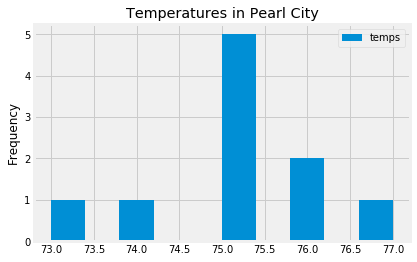

In [185]:
#Plot the results as a histogram. **Is this correct?

temps_PearlCity.plot.hist(title="Temperatures in Pearl City")
plt.show()

In [180]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
temps_PearlCity = pd.DataFrame(temps_PearlCity, columns=['date', 'temps'])
temps_PearlCity.set_index('date', inplace=True, )
temps_PearlCity

# Why is it NaN results rather than dates??

,temps
date,
NaN,75.0
NaN,76.0
NaN,75.0
NaN,74.0
NaN,75.0
NaN,76.0
NaN,73.0
NaN,75.0
NaN,75.0


![precipitation](Images/station-histogram.png)

In [186]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [190]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps_2(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps_2('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [192]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

calc_temps_2.plot.bar(title="Trip Average Temperatures")
plt.show()

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
